Mount Gdrive to Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install correct versions of Detectron2 and any dependencies needed to run the code


In [2]:
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

Cloning into 'detectron2'...
remote: Enumerating objects: 15819, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 15819 (delta 31), reused 43 (delta 17), pack-reused 15743 (from 1)
Receiving objects: 100% (15819/15819), 6.39 MiB | 21.12 MiB/s, done.
Resolving deltas: 100% (11523/11523), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.9 MB/s eta 0:00

Need cavity detection Github repo to get model weights and code

In [3]:
!git clone https://github.com/uw-cmg/cavity_defect_detection

Cloning into 'cavity_defect_detection'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 61 (delta 27), reused 26 (delta 8), pack-reused 0 (from 0)
Receiving objects: 100% (61/61), 27.69 MiB | 16.71 MiB/s, done.
Resolving deltas: 100% (27/27), done.




Here, the user sets the path to the folder of images to predict on, the values of NM_PER_PIXEL_LIST for each image, and the savepath to save the images with predictions, and key statistics in excel format


In [4]:
import os
import sys
path = './cavity_defect_detection'
sys.path.append(path)
sys.path.insert(0, os.path.abspath('./detectron2'))


In [5]:
NM_PER_PIXEL_LIST = [0.5] # Enter a nm/pixel conversion factor for each image in test set
IMAGE_THICKNESS_LIST = [50]
SAVE_PATH = '.'
NUM_CLASSES = 1
CLASS_NAMES = ['void']
CLASS_COLORS = [(0, 0, 255)]
MODEL_PATH = os.path.join(path, 'model/model_final.pth')
MODEL_PATH_BASE = os.path.join(path, 'model')
IMAGE_PATH = os.path.join(path, 'images')
IMAGE_LIST = sorted(i for i in os.listdir(IMAGE_PATH))

print(IMAGE_LIST)


['00000.png', '1 39K.png']


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

You have specified multiple images but only one value for NM_PER_PIXEL_LIST. Applying this value to all images...
You have specified multiple images but only one value for IMAGE_THICKNESS_LIST. Applying this value to all images...
On image 00000.png
(708, 708, 3)


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


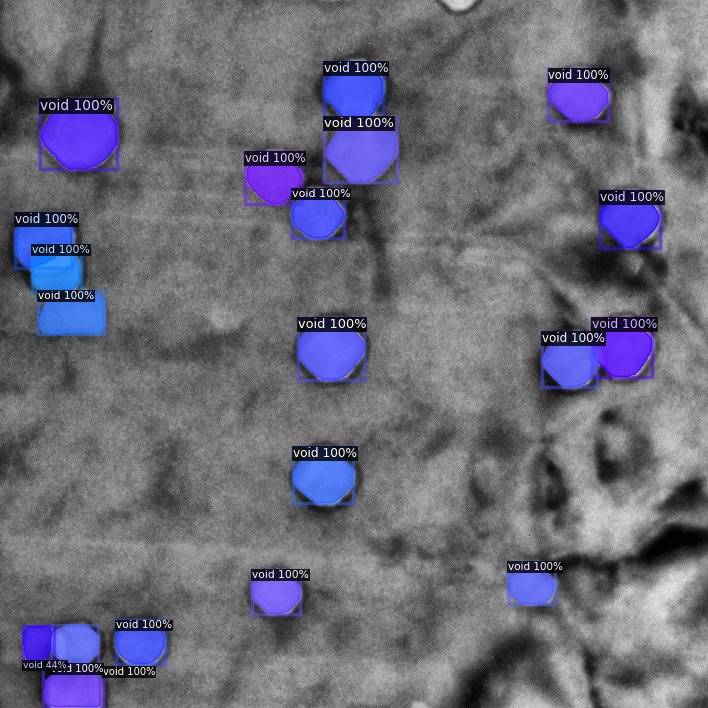

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.5.1 when using version 1.5.2. This might lead to bre

********** IMAGE PREDICTIONS **********
 Image name: 00000.png
 Defect types: ['void']
 Predicted F1 score (from random forest): 0.8779701545599998
 Calculated image confidence score: 0.9897774164384703
 Num predicted defects: 20
 Pred swelling (percent swelling): 3.41
 Pred defect density (#*10^4/nm^2): 1.595965
 Pred defect size (nm) as avg, stdev: 26.39101364311214 4.141002622455356
 Pred defect shape (Heywood circularity) as avg, stdev: 1.0219311544782932 0.018102531736836246
On image 1 39K.png
(1024, 1024, 3)


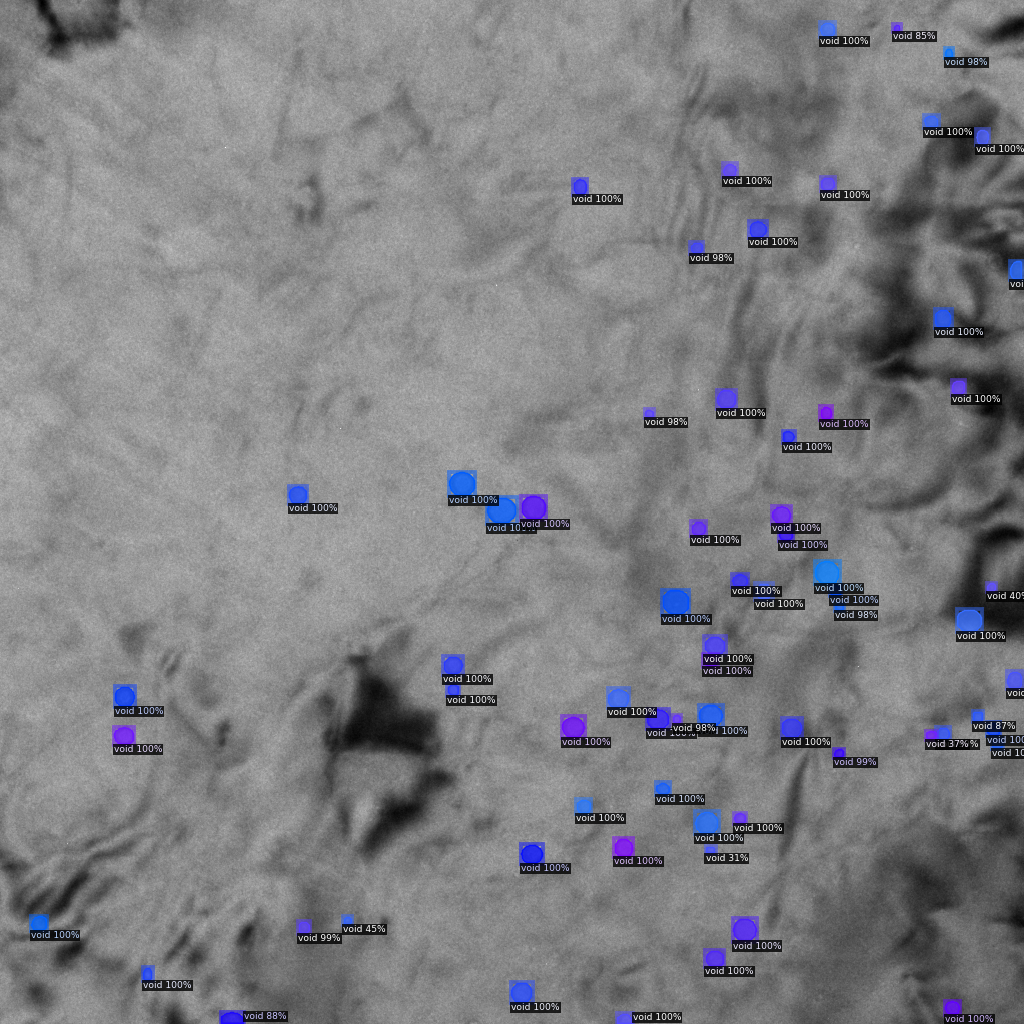

********** IMAGE PREDICTIONS **********
 Image name: 1 39K.png
 Defect types: ['void']
 Predicted F1 score (from random forest): 0.7212598106980004
 Calculated image confidence score: 0.9851271051890369
 Num predicted defects: 68
 Pred swelling (percent swelling): 0.16
 Pred defect density (#*10^4/nm^2): 2.593994
 Pred defect size (nm) as avg, stdev: 7.634965580384953 2.4849226651254006
 Pred defect shape (Heywood circularity) as avg, stdev: 1.0314186884647913 0.026050116781542496


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.5.1 when using version 1.5.2. This might lead to bre

In [6]:
import make_object_predictions
make_object_predictions.run(IMAGE_LIST=IMAGE_LIST,
                            IMAGE_PATH=IMAGE_PATH,
                            MODEL_PATH=MODEL_PATH,
                            MODEL_PATH_BASE= MODEL_PATH_BASE,
                            SAVE_PATH=SAVE_PATH,
                            NM_PER_PIXEL_LIST=NM_PER_PIXEL_LIST,
                            IMAGE_THICKNESS_LIST=IMAGE_THICKNESS_LIST,
                            NUM_CLASSES=NUM_CLASSES,
                            CLASS_NAMES=CLASS_NAMES,
                            CLASS_COLORS=CLASS_COLORS)